In [1]:
#!conda install pandas -y 
#!pip install hyperopt

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso

In [4]:
def f(x): 
    return -np.sin(3*x)-x**2-0.7*x

In [5]:
X, y = load_diabetes(return_X_y=True)

def f(alpha):
    reg = Lasso(alpha)
    reg.fit(X,y)
    score = cross_val_score(reg, X,y, scoring='neg_mean_squared_error').mean()
    return score  

**Goal:** Minimize $f$ using `Hyperopt`. Let's pretend for a moment that $f(x)$ is actually the loss function of machine learning problem with hyperparameter $x$.

In [6]:
#x = np.linspace(-1, 1, 1000)
#y = f(x)

# Place where the minimum is reached, and the value there.
#x_min = x[np.argmin(y)]
#y_min = min(y)

In [7]:
#print(x_min)
#print(y_min)

In [8]:
#plt.plot(x,y);

### Example: Compare random search for hyperparameter optimization against TPE

In [9]:
from hyperopt import hp

# Create domain space: generator for our space
mesh = hp.uniform('x', 0, 1)

In [10]:
# Create `Trials` object to store simulation history
from hyperopt import Trials

tpe_trials = Trials()
rand_trials = Trials()

# Algorithms to sample from
from hyperopt import rand, tpe # random search and TPE

tpe_algo = tpe.suggest
rand_algo = rand.suggest

#### Simulation time!

In [11]:
# Simulation using TPE
from hyperopt import fmin

# Run evals on TPE
tpe_best = fmin(fn=f, space=mesh, algo=tpe_algo, trials=tpe_trials
                , max_evals=1000, rstate=np.random.RandomState(123)
               )
print(tpe_best)

# Run evals on TPE
rand_best = fmin(fn=f, space=mesh, algo=rand_algo, trials=rand_trials
                , max_evals=1000, rstate=np.random.RandomState(123)
               )
print(tpe_best)

100%|█| 1000/1000 [00:26<00:00, 38.01trial/s, best loss: -3850.8263203009105
{'x': 0.9999925187354476}
100%|█| 1000/1000 [00:15<00:00, 64.63trial/s, best loss: -3850.6866400834924
{'x': 0.9999925187354476}


In [12]:
tpe_results = pd.DataFrame({
                            'iteration':tpe_trials.idxs_vals[0]['x'],
                            'x': tpe_trials.idxs_vals[1]['x'],
                            'loss':[row['loss'] for row in tpe_trials.results]
})

rand_results = pd.DataFrame({
                            'iteration':rand_trials.idxs_vals[0]['x'],
                            'x': rand_trials.idxs_vals[1]['x'],
                            'loss':[row['loss'] for row in rand_trials.results]
})

In [13]:
tpe_results.head()

,iteration,x,loss
0,0,0.728030,-3512.011235
1,1,0.858694,-3669.493367
2,2,0.992518,-3840.768957
3,3,0.673477,-3451.059046
4,4,0.562615,-3331.225672


Text(0, 0.5, 'Value of x')

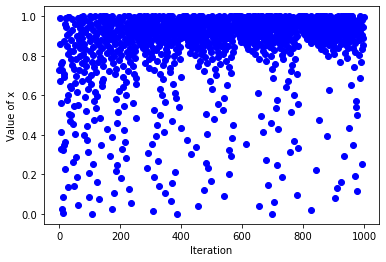

In [14]:
plt.plot(tpe_results['iteration'], tpe_results['x'], 'bo')
plt.xlabel('Iteration')
plt.ylabel('Value of x')

Text(0, 0.5, 'Value of x')

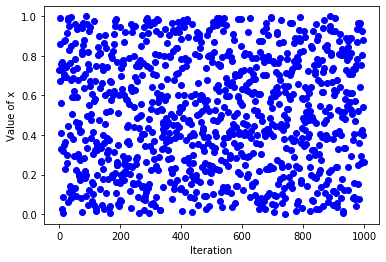

In [15]:
plt.plot(rand_results['iteration'], rand_results['x'], 'bo')
plt.xlabel('Iteration')
plt.ylabel('Value of x')

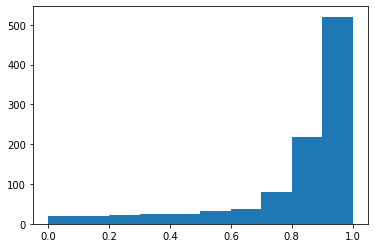

In [16]:
plt.hist(tpe_results['x']);